# Data Source: GeoDist: The CEPII's distances and geographical database
Bilateral distances between the largest cities of those two countries (in terms
of population)

In [1]:
import pandas as pd
import pickle
import numpy as np
import sklearn
from geopy import distance
import matplotlib.pyplot as plt

In [2]:
with open('../pkl/COVID_sorted_W_tensors_ver2.pkl', 'rb') as f:
    travel_tensor_raw = pickle.load(f) 
    
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f) 

In [3]:
country_cutline = 50 # 69, 70 give None homogeneity
travel_tensors = travel_tensor_raw[:,0:country_cutline,0:country_cutline]

In [4]:
travel_tensors.shape

(22, 50, 50)

In [5]:
label_dict

{0: 'Jungnang-gu',
 1: 'Dongjak-gu',
 2: 'Yangcheon-gu',
 3: 'Guro-gu',
 4: 'Gangnam-gu',
 5: 'Jung-gu',
 6: 'Jongno-gu',
 7: 'Eunpyeong-gu',
 8: 'Gangseo-gu',
 9: 'Yeongdeungpo-gu',
 10: 'Dongdaemun-gu',
 11: 'Songpa-gu',
 12: 'Seongdong-gu',
 13: 'Geumcheon-gu',
 14: 'Gwanak-gu',
 15: 'Seocho-gu',
 16: 'Seodaemun-gu',
 17: 'Gangbuk-gu',
 18: 'Yongsan-gu',
 19: 'Nowon-gu',
 20: 'Mapo-gu',
 21: 'Ansan-si',
 22: 'Seongbuk-gu',
 23: 'Goyang-si',
 24: 'Seongnam-si',
 25: 'Gwangjin-gu',
 26: 'Dobong-gu',
 27: 'Namyangju-si',
 28: 'Gangdong-gu',
 29: 'Anyang-si',
 30: 'Guri-si',
 31: 'Suwon-si',
 32: 'Paju-si',
 33: 'Gwangmyeong-si',
 34: 'Gimpo-si',
 35: 'Anseong-si',
 36: 'Gunpo-si',
 37: 'Uijeongbu-si',
 38: 'Gwacheon-si',
 39: 'Icheon-si',
 40: 'Pyeongtaek-si',
 41: 'Hanam-si',
 42: 'Siheung-si',
 43: 'Yangpyeong-gun',
 44: 'Dongducheon-si',
 45: 'Yongin-si',
 46: 'Gwangju-si',
 47: 'Bucheon-si',
 48: 'Yeoncheon-gun',
 49: 'Yeoju-si',
 50: 'Hwaseong-si',
 51: 'Uiwang-si',
 52: 'Pocheon-

In [6]:
attract = np.sum(travel_tensors, 1) # attractiveness
emit = np.sum(travel_tensors, 2) # emmisiveness
mean_adj = np.mean(travel_tensors,0)

In [7]:
attract.shape

(22, 50)

In [8]:
mean_adj.shape

(50, 50)

In [9]:
avg_attract = np.mean(attract, 0)
avg_emit = np.mean(emit, 0)

In [10]:
ccode = pd.read_csv('countries_codes_and_coordinates.csv').replace('"','', regex=True).replace(' ','', regex=True)

In [11]:
ccode = pd.read_csv('../COVIDdata/Region.csv')

In [12]:
ccode[ccode['city']=='Gangdong-gu']['latitude']-ccode[ccode['city']=='Gangdong-gu']['longitude']

2   -89.593345
dtype: float64

In [13]:
label3 = list(label_dict.values())

In [14]:
float(ccode[ccode['city']=='Seoul']['latitude'])

37.566953000000005

In [15]:
# label3 = []
# for i in range(len(label2)):
#     for j in range(len(ccode)):
#         if(label2[i]==ccode.iloc[j,1]):
#             if(ccode.iloc[j,2] == ccode.iloc[j-1,2]):
#                 continue
#             label3.append(ccode.iloc[j,2])

In [16]:
label_dict

{0: 'Jungnang-gu',
 1: 'Dongjak-gu',
 2: 'Yangcheon-gu',
 3: 'Guro-gu',
 4: 'Gangnam-gu',
 5: 'Jung-gu',
 6: 'Jongno-gu',
 7: 'Eunpyeong-gu',
 8: 'Gangseo-gu',
 9: 'Yeongdeungpo-gu',
 10: 'Dongdaemun-gu',
 11: 'Songpa-gu',
 12: 'Seongdong-gu',
 13: 'Geumcheon-gu',
 14: 'Gwanak-gu',
 15: 'Seocho-gu',
 16: 'Seodaemun-gu',
 17: 'Gangbuk-gu',
 18: 'Yongsan-gu',
 19: 'Nowon-gu',
 20: 'Mapo-gu',
 21: 'Ansan-si',
 22: 'Seongbuk-gu',
 23: 'Goyang-si',
 24: 'Seongnam-si',
 25: 'Gwangjin-gu',
 26: 'Dobong-gu',
 27: 'Namyangju-si',
 28: 'Gangdong-gu',
 29: 'Anyang-si',
 30: 'Guri-si',
 31: 'Suwon-si',
 32: 'Paju-si',
 33: 'Gwangmyeong-si',
 34: 'Gimpo-si',
 35: 'Anseong-si',
 36: 'Gunpo-si',
 37: 'Uijeongbu-si',
 38: 'Gwacheon-si',
 39: 'Icheon-si',
 40: 'Pyeongtaek-si',
 41: 'Hanam-si',
 42: 'Siheung-si',
 43: 'Yangpyeong-gun',
 44: 'Dongducheon-si',
 45: 'Yongin-si',
 46: 'Gwangju-si',
 47: 'Bucheon-si',
 48: 'Yeoncheon-gun',
 49: 'Yeoju-si',
 50: 'Hwaseong-si',
 51: 'Uiwang-si',
 52: 'Pocheon-

In [17]:
import geopy.distance

In [18]:
gravity_df = np.zeros([country_cutline*country_cutline,6])
line = 0
for i in range(country_cutline):
    for j in range(country_cutline):
        e = avg_emit[i]
        a = avg_attract[j]
        source = label3[i]
        target = label3[j]
        y = mean_adj[i,j]
        slat = (ccode[ccode['city']==source].iloc[0,:]['latitude'])
        slong = (ccode[ccode['city']==source].iloc[0,:]['longitude'])
        tlat = (ccode[ccode['city']==target].iloc[0,:]['latitude'])
        tlong = (ccode[ccode['city']==target].iloc[0,:]['longitude'])
        coords_1 = (slat, slong)
        coords_2 = (tlat, tlong)
        d = distance.distance(coords_1, coords_2).km
        if((source==target)
#            |(len(d)==0)
          ):
            e,a,d,y = -1,-1,-1,0
        gravity_df[line,0] = e
        gravity_df[line,1] = a
#         print(i,j,d)
        gravity_df[line,2] = d
        gravity_df[line,3] = y
        gravity_df[line,4] = i
        gravity_df[line,5] = j
        line += 1

In [19]:
gravity_df.shape

(2500, 6)

In [20]:
gravity_df = pd.DataFrame(gravity_df)
gravity_df.columns = ['emit','attract','distance','T','Source','Target']
gravity_df = gravity_df[gravity_df['T']!=0]

In [21]:
import copy
gravity_df2 = copy.deepcopy(gravity_df)

In [22]:
# def scale(em):
#     return np.exp(em)
# #     return em + np.exp(1)
# #     return 10+90*(em-np.min(em))/(np.max(em)-np.min(em))

In [23]:
# gravity_df2['emit'] = scale(gravity_df2['emit'])
# gravity_df2['attract'] = scale(gravity_df2['attract'])
# gravity_df2['distance'] = scale(gravity_df2['distance'])
# gravity_df2['T'] = scale(gravity_df2['T'])

In [24]:
# def scale(em):
#     return 10+90*(em-np.min(em))/(np.max(em)-np.min(em))

In [25]:
# gravity_df['emit'] = scale(gravity_df['emit'])
# gravity_df['attract'] = scale(gravity_df['attract'])
# gravity_df['distance'] = scale(gravity_df['distance'])
# gravity_df['T'] = scale(gravity_df['T'])

In [26]:
# log_grav_df = np.log(gravity_df2)

In [27]:
# log_grav_df

# Right skewed log(T)

In [28]:

# # plt.figure(figsize=(12,12))
# # plt.scatter(log_grav_df['attract'], log_grav_df['y'])
# plt.hist(log_grav_df['T'])
# plt.ylabel('Count')
# plt.xlabel('Number of trips')
# plt.title('Histogram of y = log(T) ')

In [29]:
# np.exp(log_grav_df['T'])

In [30]:
# fig = plt.figure(figsize=[8,8])
# plt.subplot(3, 2, 1)
# plt.scatter(log_grav_df['emit'],(log_grav_df['T']))
# plt.xlabel('log(emit)'); plt.ylabel('y')
# plt.subplot(3, 2, 2)
# plt.scatter(np.log(log_grav_df['emit']),np.log(log_grav_df['T']))
# plt.xlabel('log(emit)'); plt.ylabel('log( y )')

# plt.subplot(3, 2, 3)
# plt.scatter(log_grav_df['attract'],(log_grav_df['T']))
# plt.xlabel('log(attract)'); plt.ylabel('y')
# plt.subplot(3, 2, 4)
# plt.scatter(log_grav_df['attract'],np.log(log_grav_df['T']))
# plt.xlabel('log(attract)'); plt.ylabel('log( y )')

# plt.subplot(3, 2, 5)
# plt.scatter(log_grav_df['distance'],(log_grav_df['T']))
# plt.xlabel('log(distance)'); plt.ylabel('y')
# plt.subplot(3, 2, 6)
# plt.scatter(log_grav_df['distance'],np.log(log_grav_df['T']))
# plt.xlabel('log(distance)'); plt.ylabel('log( y )')

# fig.subplots_adjust(wspace=0.3, hspace=0.5)
# plt.show()

In [31]:
import statsmodels.api as sm
df_processed = gravity_df2[gravity_df2['T']>0][['emit','attract','distance','T']]
X = (df_processed[['emit','attract','distance']])
X = sm.add_constant(X)
y = (df_processed['T'])
# X = gravity_df2[['emit','attract','distance']]
# y = gravity_df2['T']

# glm = sm.GLM(y, X, family=sm.families.InverseGaussian(link=sm.families.links.inverse_power))
# glm = sm.GLM(y, X, family=sm.families.Gamma())
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.log))
# glm = sm.OLS(y, X)
# glm = sm.GLM(y, X, family=sm.families.Tweedie(link=sm.families.links.identity, var_power=0.1))
result = glm.fit()
result.summary()
# gamma_model = smf.glm(formula='y ~ emit + attract + distance', data=log_grav_df, family=sm.families.Gaussian(sm.families.links.identity))
# gamma_results = gamma_model.fit()
# print(gamma_results.summary())

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  # This is added back by InteractiveShellApp.init_path()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      T   No. Observations:                  504
Model:                            GLM   Df Residuals:                      500
Model Family:                Gaussian   Df Model:                            3
Link Function:                    log   Scale:                        0.011145
Method:                          IRLS   Log-Likelihood:                 420.05
Date:                Tue, 06 Oct 2020   Deviance:                       5.5724
Time:                        11:14:30   Pearson chi2:                     5.57
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6446      0.125    -21.219      0.000      -2.889      -2.400
emit           0.2990      0.031      9.568      0.000       0.238       0.360
attract        0.2328      0.014     16.627      0.000       0.205       0.260
distance      -0.0743      0.007    -10.166      0.000      -0.089      -0.060
==============================================================================
"""

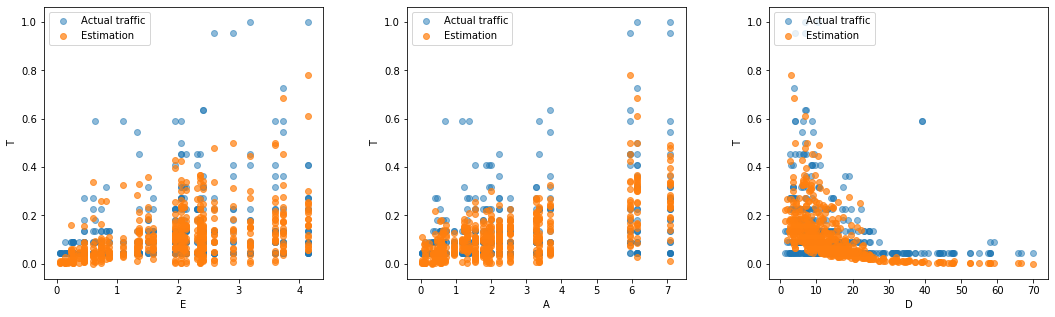

In [32]:
pred = result.predict(sm.add_constant(df_processed[['emit','attract','distance']]))

fig = plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
X= df_processed['emit']
plt.scatter(X,y, alpha=0.5, label = 'Actual traffic')
plt.scatter(X,pred, alpha=0.7, label = 'Estimation')
plt.xlabel("E")
plt.ylabel("T")
plt.legend()

plt.subplot(1, 3, 2)
X= df_processed['attract']
plt.scatter(X,y, alpha=0.5, label = 'Actual traffic')
plt.scatter(X,pred, alpha=0.7, label = 'Estimation')
plt.xlabel("A")
plt.ylabel("T")
plt.legend()

plt.subplot(1, 3, 3)
X= df_processed['distance']
plt.scatter(X,y, alpha=0.5, label = 'Actual traffic')
plt.scatter(X,pred, alpha=0.7, label = 'Estimation')
plt.xlabel("D")
plt.ylabel("T")
plt.legend(loc='upper left')

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [33]:
gravity_df[gravity_df['Target']==3]

,emit,attract,distance,T,Source,Target
53,2.409091,3.681818,6.917628,0.636364,1.0,3.0
103,2.318182,3.681818,3.030252,0.227273,2.0,3.0
203,3.590909,3.681818,14.333819,0.045455,4.0,3.0
253,2.363636,3.681818,12.324233,0.045455,5.0,3.0
403,2.909091,3.681818,7.025600,0.363636,8.0,3.0
453,2.045455,3.681818,3.508711,0.318182,9.0,3.0
503,1.954545,3.681818,16.042869,0.090909,10.0,3.0
653,2.409091,3.681818,4.355956,0.227273,13.0,3.0
703,3.727273,3.681818,5.966121,0.545455,14.0,3.0
803,2.045455,3.681818,10.263704,0.045455,16.0,3.0


In [34]:
print(label_dict[17],label_dict[21])

Gangbuk-gu Ansan-si


In [35]:
week_slices = pd.date_range('2020-01-19', periods=23, freq='W')
xaxis = week_slices[1:]

In [36]:
def dist(source,target):
    slat = (ccode[ccode['city']==source].iloc[0,:]['latitude'])
    slong = (ccode[ccode['city']==source].iloc[0,:]['longitude'])
    tlat = (ccode[ccode['city']==target].iloc[0,:]['latitude'])
    tlong = (ccode[ccode['city']==target].iloc[0,:]['longitude'])
    coords_1 = (slat, slong)
    coords_2 = (tlat, tlong)
    d = distance.distance(coords_1, coords_2).km
    d = np.float(d)
    return d

In [255]:
cnt1=4
cnt2=3

In [256]:
# pred_RU_to_US = result.predict(np.log([RU_emit, US_attract, d]))
# pred_US_to_RU = result.predict(np.log(np.array([US_emit, RU_attract, d])+1e-30))
pred_US_to_RU_list = []
pred_RU_to_US_list = []
for t in range(22):
    RU_emit = np.sum(travel_tensors[-22+t,:], 1)[cnt1]
    US_emit = np.sum(travel_tensors[-22+t,:], 1)[cnt2]
    RU_attract = np.sum(travel_tensors[-22+t,:], 0)[cnt1]
    US_attract = np.sum(travel_tensors[-22+t,:], 0)[cnt2]
    d = dist(label_dict[cnt1],label_dict[cnt2])
    pred_US_to_RU = result.predict(np.array([1,US_emit, RU_attract, d]))
# result.predict(np.log(np.array([US_emit, RU_attract, d])+1e-30))
    pred_US_to_RU_list.append(pred_US_to_RU)
    pred_RU_to_US = result.predict(np.array([1,RU_emit, US_attract, d]))
    pred_RU_to_US_list.append(pred_RU_to_US)
#     print(RU_emit, US_attract, pred_RU_to_US)

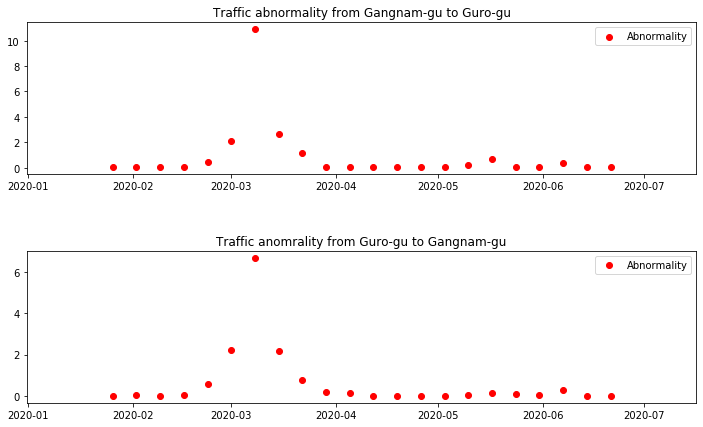

In [257]:
# y = travel_tensors[-24:,cnt2,cnt1] - np.exp(pred_US_to_RU_list).T
# y = y[0]
fig = plt.figure(figsize=[12,7])
plt.subplot(2, 1, 1)
abnormal_US_to_RU = np.abs(travel_tensors[-22:,cnt2,cnt1] - np.concatenate(pred_US_to_RU_list))
abnormal_US_to_RU = np.log(abnormal_US_to_RU+1)
plt.scatter(xaxis[-22:], abnormal_US_to_RU, color='red', label='Abnormality')
# plt.plot(xaxis[-22:],pred_US_to_RU_list, color='green', label='Estimation by Gravity Model')
# plt.axvline(xaxis[time], linestyle='--', label='Russia Worldcup')
plt.title('Traffic abnormality from '+label_dict[cnt1]+' to '+ label_dict[cnt2])
plt.legend()

plt.subplot(2, 1, 2)
abnormal_RU_to_US = np.abs(travel_tensors[-22:,cnt1,cnt2]- np.concatenate(pred_RU_to_US_list))
abnormal_RU_to_US = np.log(abnormal_RU_to_US+1)
plt.scatter(xaxis[-22:], abnormal_RU_to_US, color='red', label='Abnormality')
# plt.plot(xaxis[-22:],pred_RU_to_US_list, color='green', label='Estimation by Gravity Model')
# plt.axvline(xaxis[time], linestyle='--', label='Russia Worldcup')
plt.title('Traffic anomrality from '+label_dict[cnt2]+' to '+ label_dict[cnt1])
plt.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [217]:
# cnt1=24
# cnt2=0
# time = -18
RU_emit = np.sum(travel_tensors[time,:], 1)[cnt1]
US_emit = np.sum(travel_tensors[time,:], 1)[cnt2]
RU_attract = np.sum(travel_tensors[time,:], 0)[cnt1]
US_attract = np.sum(travel_tensors[time,:], 0)[cnt2]
d = dis_df[(dis_df['iso_o']==label3[cnt2])&(dis_df['iso_d']==label3[cnt1])]['dist']
d = np.float(d)

NameError: name 'time' is not defined

In [ ]:
logT_RUtoUS = np.log(travel_tensors[time,cnt1,cnt2])
logT_UStoRU = np.log(travel_tensors[time,cnt2,cnt1])

In [ ]:
pred = result.predict(log_grav_df_processed[['emit','attract','distance']])
pred_RU_to_US = result.predict(np.log([RU_emit, US_attract, d]))
pred_US_to_RU = result.predict(np.log([US_emit, RU_attract, d]))

fig = plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
X= log_grav_df_processed['emit']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(US_emit), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(US_emit), pred_US_to_RU, label = 'Estimation')
plt.xlabel("log(E)")
plt.ylabel("log(T)")
plt.legend()

plt.subplot(1, 3, 2)
X= log_grav_df_processed['attract']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(RU_attract), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(RU_attract), pred_US_to_RU, label = 'Estimation')
plt.xlabel("log(A)")
plt.ylabel("log(T)")
plt.legend()

plt.subplot(1, 3, 3)
X= log_grav_df_processed['distance']
plt.scatter(X,log_grav_df_processed['T'], alpha=0.1)
plt.scatter(X,pred, alpha=0.1)
plt.scatter(np.log(d), logT_UStoRU, color='red', label = 'History')
plt.scatter(np.log(d), pred_US_to_RU, label = 'Estimation')

plt.xlabel("log(D)")
plt.ylabel("log(T)")
plt.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [ ]:
plt.hist(log_grav_df_processed['T'], bins=30)

In [ ]:
# 100 0.770
# 80, 0.738
# 70, 0.727
# cutline = 60, R2 = 0.701
# cutline = 50, R2 = 0.66
# cutline = 40, R2 = 0.62


In [ ]:
# Mean >= 1 filter
# 100, 0.656
# 70, 0.660